In [6]:
!pip install plotly

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install plotly
import plotly.express as px



You should consider upgrading via the 'C:\Users\kavi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
df = pd.read_csv(r"C:\Users\kavi\Downloads\archive (16)\Titanic-Dataset.csv")

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\kavi\AppData\Local\Temp\ipykernel_12028\2993107926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\kavi\AppData\Local\Temp\ipykernel_12028\2993107926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)
df['FamilySize'] = df['SibSp'] + df['Parch']


In [10]:
fig = px.histogram(df, x="Age", nbins=30, title="Age Distribution")
fig.show()


In [11]:
fig = px.bar(df, x="AgeGroup", y="Survived",
             title="Survival Rate by Age Group",
             color="AgeGroup")
fig.show()


In [12]:
fig = px.bar(df, x="Embarked", y="Survived",
             title="Survival Rate by Embarkation Port",
             color="Embarked")
fig.show()


In [13]:
fig = px.bar(df, x="FamilySize", y="Survived",
             title="Survival Rate by Family Size",
             color="FamilySize")
fig.show()


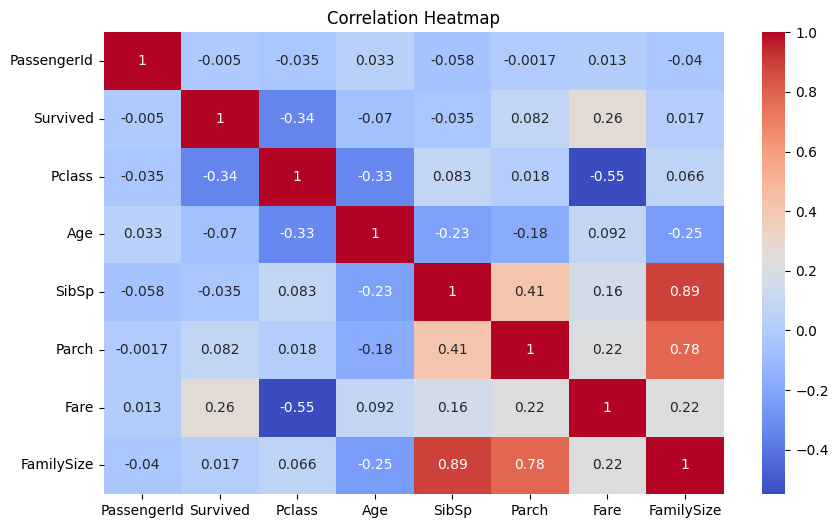

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [16]:
print(df.groupby('AgeGroup')['Survived'].mean())



AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.331096
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64


C:\Users\kavi\AppData\Local\Temp\ipykernel_12028\1134636974.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [17]:
print(df.groupby('Embarked')['Survived'].mean())


Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [18]:
print(df.groupby('FamilySize')['Survived'].mean())

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [19]:
fig = px.scatter(df,
                 x="Age",
                 y="Fare",
                 color="Survived",
                 size="FamilySize",
                 hover_data=["Sex", "Pclass"],
                 title="Interactive Titanic Dashboard")

fig.show()
